In [9]:
import torch
import os
from datasets import Dataset
from transformer_lens import HookedTransformer

from core.utils.feature_activation import draw_feature_density

os.environ["https_proxy"] = "http://localhost:7890"

Loading dataset from disk:   0%|          | 0/1024 [00:00<?, ?it/s]

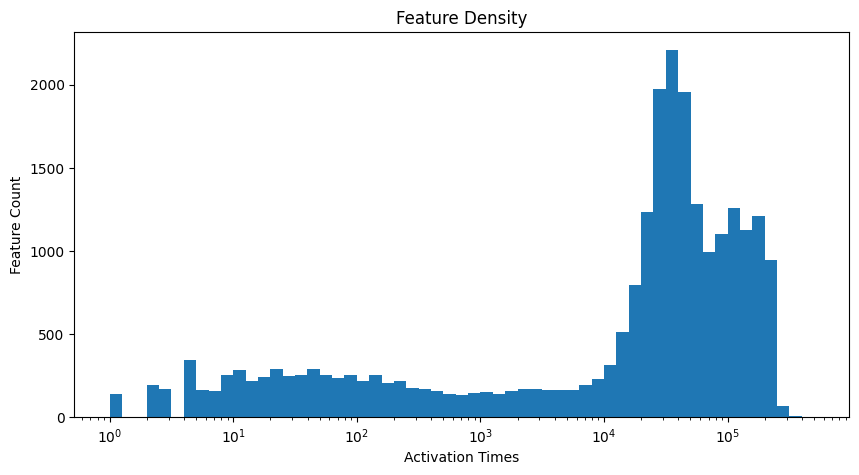

In [14]:
feature_activations = Dataset.load_from_disk("analysis/test")
draw_feature_density(torch.tensor(feature_activations["act_times"], device="cuda"), "density.png")

In [15]:
model = HookedTransformer.from_pretrained('gpt2', device="cuda")
model.eval()

Loaded pretrained model gpt2 into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-11): 12 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [7]:
import json

index = 6243

print(f"Index: {index}")

sample = feature_activations[index]

act_times = sample["act_times"]
print(f"Activation times: {act_times}")
for j in range(150):
    contexts = torch.tensor(sample["contexts"][j], device="cuda")
    activated = torch.tensor(sample["feature_acts"][j], device="cuda").nonzero(as_tuple=True)[0]
    print(f"Context: ", json.dumps(model.tokenizer.decode(contexts)))
    print(f"Activated tokens: ", json.dumps(model.to_str_tokens(contexts[activated])))

Index: 6243
Activation times: 64290
Context:  "Boateng reveals AC Milan changes\n\n13.8 || webmaster\n\nSource: Football Italia\n\nKevin-Prince Boateng hints at a big change in Milan this season. \u0093The Coach told me I won\u0092t be playing as a trequartista for much longer...\u0094\n\nThe Ghanaian international played behind the two strikers during their Scudetto-winning campaign, but the transfer market could bring changes.\n\n\u0093My preferred role is trequartista and I\u0092m enjoying it, albeit not for much longer. Coach Allegri already told me in future I\u0092ll have to play in midfield, on the right or the left,\u0094 Boateng said in Tuttosport.\n\nThis suggests there will be a new trequartista joining the club during the summer, with names like Alberto Aquilani of Liverpool or Fiorentina outcast Riccardo Montolivo heavily linked.\n\nAnother option is that Antonio Cassano will be redeployed in that position to ensure he has more playing time.\n\n\u0093I think our team is co